In [9]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Lecture 20 #

## Average (Mean) ##

In [14]:
values = make_array(2, 3, 3, 9)
values

array([2, 3, 3, 9])

In [16]:
sum(values)/len(values)

4.25

In [18]:
np.average(values)

4.25

In [20]:
np.mean(values)

4.25

In [22]:
(2 + 3 + 3 + 9)/4

4.25

In [24]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [28]:
2*0.25 + 3*0.5 + 9*0.25

4.25

In [30]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


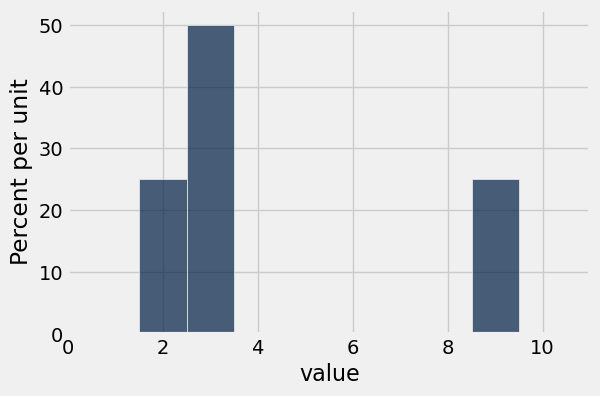

In [32]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist('value', bins = bins_for_display)

In [34]:
new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

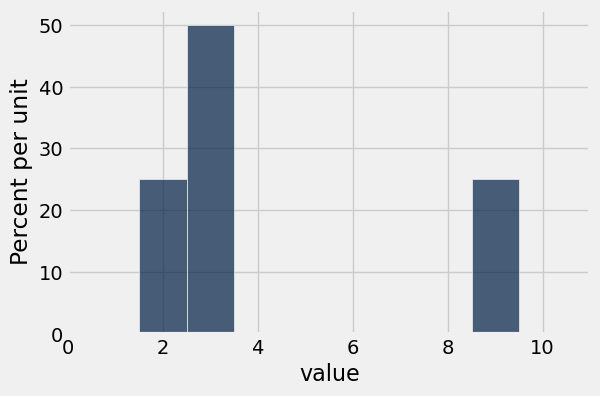

In [36]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [40]:
np.average(new_vals)

4.25

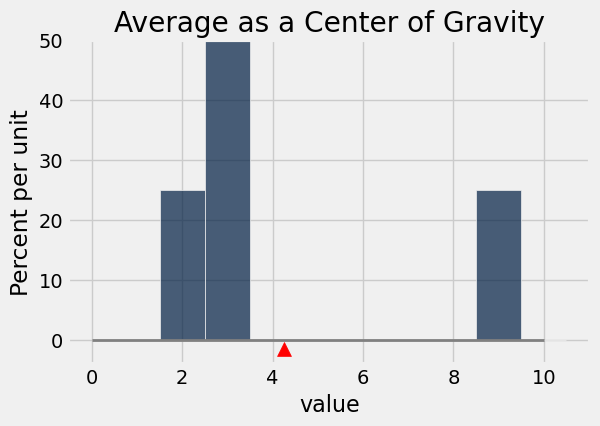

In [42]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)
plots.ylim(-0.04, 0.5)
plots.plot([0, 10], [0, 0], color='grey', lw=2)
plots.scatter(4.25, -0.015, marker='^', color='red', s=100)
plots.title('Average as a Center of Gravity');

## Standard Deviation ##

In [44]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [46]:
average_value = np.mean(values)
average_value

4.25

In [49]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [51]:
sum(deviations)

0.0

In [54]:
sd_table = sd_table.with_column('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [59]:
variance = np.mean(deviations ** 2)
variance

7.6875

In [63]:
sd = variance ** 0.5
sd

2.7726341266023544

In [65]:
np.std(values)

2.7726341266023544

## Chebyshev's Bounds: "Tail" Bounds ##

In [68]:
z = 3.5
1 - 1/z**2

0.9183673469387755

In [70]:
z = 0.5
1 - 1/z**2

-3.0

In [77]:
births = Table.read_table('baby.csv').drop('Maternal Smoker')
births.show(6)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115
108,282,23,67,125
136,286,25,62,93
138,244,33,62,178


In [79]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

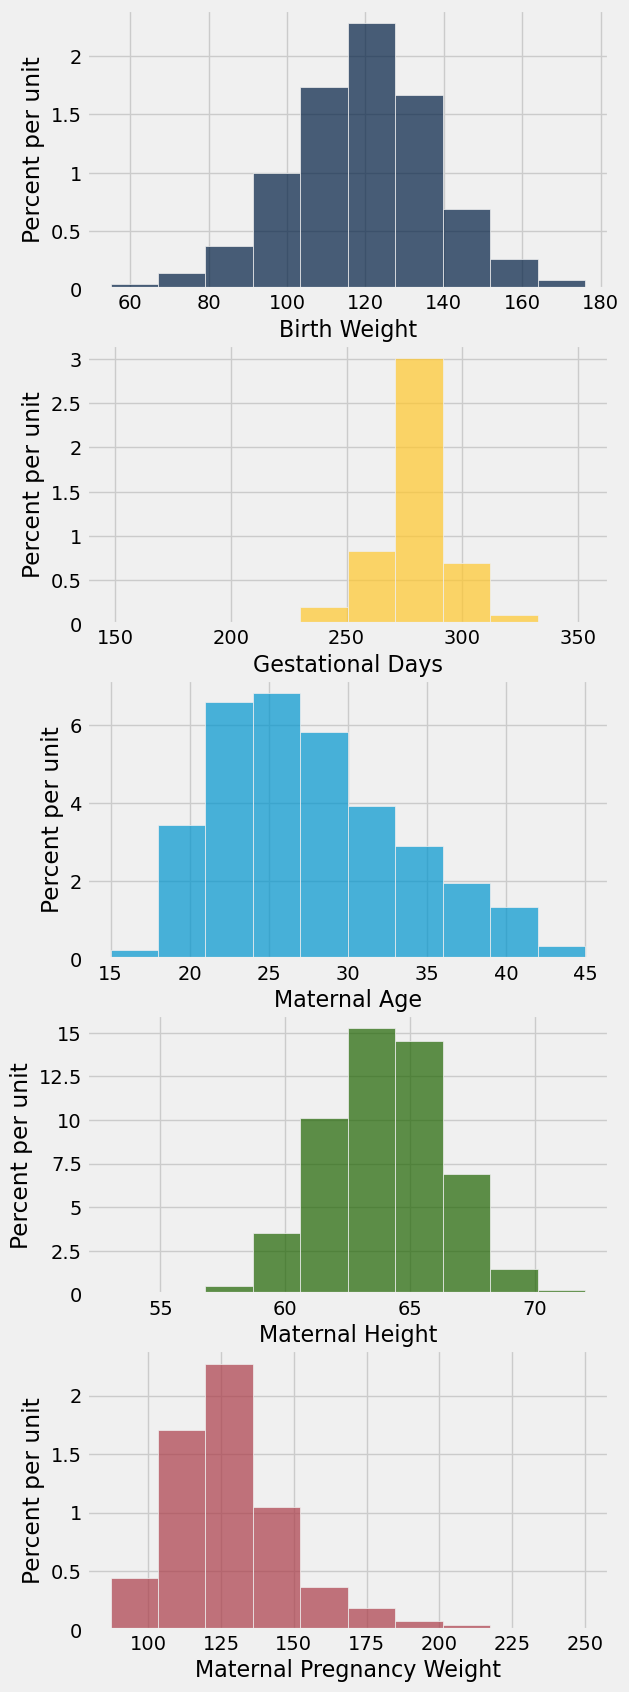

In [81]:
births.hist(overlay = False)

In [84]:
mpw = births.column('Maternal Pregnancy Weight')
mean = np.mean(mpw)
sd = np.std(mpw)
mean, sd

(128.4787052810903, 20.725449704280411)

In [88]:
within_3_SDs = births.where(
    'Maternal Pregnancy Weight', are.between(mean - 3*sd, mean + 3*sd))
within_3_SDs.show(6)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
120,284,27,62,100
113,282,33,64,135
128,279,28,64,115
108,282,23,67,125
136,286,25,62,93
138,244,33,62,178


In [96]:
1 - 1/3**2

0.8888888888888888

In [93]:
within_3_SDs.num_rows / births.num_rows

0.9863713798977853

In [98]:
births.labels

('Birth Weight',
 'Gestational Days',
 'Maternal Age',
 'Maternal Height',
 'Maternal Pregnancy Weight')

In [102]:
for feature in births.labels:
    values = births.column(feature)
    mean = np.mean(values)
    sd = np.std(values)
    print()
    print(feature)
    for z in make_array(2, 3, 4, 5):
        chosen = births.where(feature, are.between(mean - z*sd, mean + z*sd))
        proportion = chosen.num_rows / births.num_rows
        percent = round(proportion * 100, 2)
        print('Average plus or minus', z, 'SDs:', percent, '%')


Birth Weight
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.57 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Gestational Days
Average plus or minus 2 SDs: 93.78 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.57 %
Average plus or minus 5 SDs: 99.83 %

Maternal Age
Average plus or minus 2 SDs: 94.89 %
Average plus or minus 3 SDs: 99.91 %
Average plus or minus 4 SDs: 100.0 %
Average plus or minus 5 SDs: 100.0 %

Maternal Height
Average plus or minus 2 SDs: 97.19 %
Average plus or minus 3 SDs: 99.66 %
Average plus or minus 4 SDs: 99.91 %
Average plus or minus 5 SDs: 100.0 %

Maternal Pregnancy Weight
Average plus or minus 2 SDs: 95.06 %
Average plus or minus 3 SDs: 98.64 %
Average plus or minus 4 SDs: 99.49 %
Average plus or minus 5 SDs: 99.91 %


## Standard Units ##

In [120]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [106]:
ages = births.column('Maternal Age')
ages

array([27, 33, 28, ..., 30, 21, 38])

In [108]:
ages_standard_units = standard_units(ages)
ages_standard_units

array([-0.03925456,  0.99249577,  0.13270383, ...,  0.47662061,
       -1.07100488,  1.85228771])

In [110]:
np.mean(ages_standard_units), np.std(ages_standard_units)

(-7.868020072300939e-17, 1.0)

## The SD and Bell Shaped Curves 

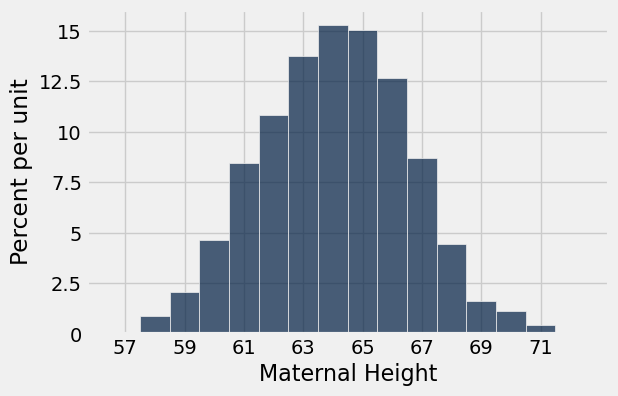

In [112]:
births.hist('Maternal Height', bins = np.arange(56.5, 72.6, 1))
plots.xticks(np.arange(57, 72, 2));

In [114]:
heights = births.column('Maternal Height')
np.mean(heights), np.std(heights)

(64.049403747870528, 2.5250254409674375)

In [118]:
make_array(np.mean(heights) - np.std(heights), np.mean(heights) + np.std(heights))

array([ 61.52437831,  66.57442919])

## Central Limit Theorem

In [123]:
united = Table.read_table('united.csv')
united.show(6)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6


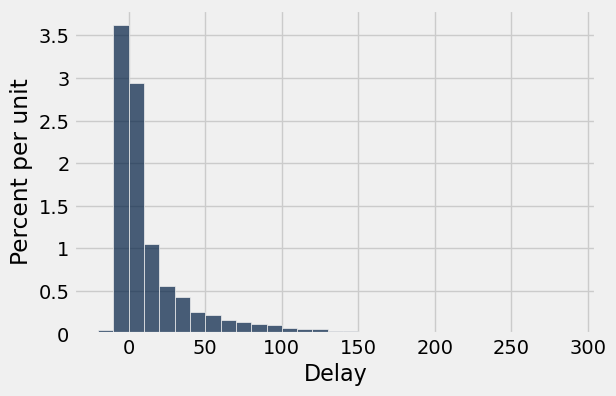

In [125]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [127]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [129]:
percentile(50, delays)

2

In [140]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [142]:
one_sample_mean(100)

15.220000000000001

In [144]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [146]:
sample_means_100 = ten_thousand_sample_means(100)

In [152]:
sample_means_100.item(1), len(sample_means_100)

(19.62, 10000)

Population Average: 16.6581555154


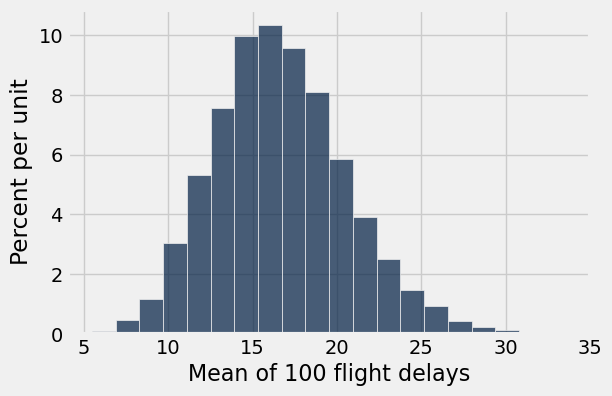

In [154]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.6581555154


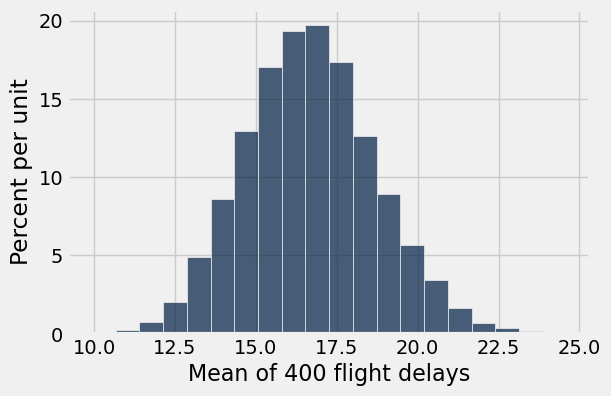

In [157]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)